Installing the necessary libraries

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

MNIST - contains images of handwritten digits, collected by the National Institute of Standards and Technology

### Files and Folders for MNIST

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
Path.BASE_PATH = path

In [5]:
print(path)

/storage/data/mnist_sample


In [6]:
# Show the contents of the path
path.ls()

(#3) [Path('labels.csv'),Path('valid'),Path('train')]

In [7]:
# Show the contens of the train folder
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

Place the variables of the images for 3's and 7's into variables

In [8]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
sevens

(#6265) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png'),Path('train/7/10046.png'),Path('train/7/10050.png'),Path('train/7/10063.png'),Path('train/7/10077.png'),Path('train/7/10086.png')...]

Showing the image of the handwritten digit

In [9]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

Showing a portion of the image in terms of numbers

In [10]:
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [11]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[0:28, 0:28])
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


In [13]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors), len(seven_tensors)

(6131, 6265)

Since, we're not working with images anymore, we'll use *show_image* function by fastai to display the tensors

<AxesSubplot:>

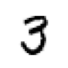

In [16]:
show_image(three_tensors[2])

In [17]:
three_tensors[1].shape

torch.Size([28, 28])

Here we're transforming the tensors into a single-three dimensional cube/tensor of some sort. Think of it as stacking all of these images and the stacked images create a cube that can be viewed in 3d space

In [19]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

As you see above, the output has 3 values. The semantics of the tensor are entirely up to us though, but looking at it, we can determine by inference that the structure is as follows: number of images, height of an image, width of an image. This is a rank-3 tensor, since we are dealing with 3 axes

In [20]:
len(stacked_threes.shape)

3

In [22]:
type(stacked_threes)

torch.Tensor

In [31]:
stacked_threes.ndim

3

<AxesSubplot:>

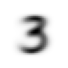

In [30]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

In [27]:
mean3.shape

torch.Size([28, 28])

In [23]:
mean3 =stacked_threes.mean(1)
show_image(mean3)

<AxesSubplot:>

In [25]:
mean3 = stacked_threes.mean(3)
show_image(mean3)

IndexError: Dimension out of range (expected to be in range of [-3, 2], but got 3)

According to the model, the image above is the ideal number 3, based on the data that we currently have. 
Below is the same for 7

<AxesSubplot:>

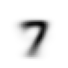

In [33]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<AxesSubplot:>

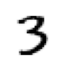

In [28]:
a_3 = stacked_threes[1]
show_image(a_3)

In [31]:
dist_3_abs = (a_3 - mean3).abs().mean() # L1 Norm or mean absolute difference
dist_3_sqr = ((a_3 - mean3)**2).abs().mean() # L2 Norm or the root mean squared error
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.0408))

In [34]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).abs().mean()
dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.0913))

By looking at the distances from the tensors given by our L1 Norm and L2 Norm, we can presume that the dist_3_abs, and dist_3_sqr have lesser distance to our image. 